**\*Remember to activate the *far_nlp* environment before starting jupyter notebook from command line and running this notebook:**

**OS X, Linux:** `$ source activate far_nlp`

**Windows:** `$ activate far_nlp`

In [1]:
# Verify the right environment is enabled by checking the python path
import sys
print(sys.executable)

/Users/Justin/anaconda/envs/far_nlp/bin/python


# Classifying Text Documents

Imagine the following scenario: Amazon is wanting to do a better job promoting new, potentially helpful, product reviews so they can be more visible to customers. The algorithm for displaying reviews is based on the current helpfulness rating for each review and new reviews get pushed to the bottom of the list because they have no rating.

Our task is to use information from past reviews that have already been rated to predict the helpfulness of new reviews. We'll focus on seeing if we can use the review text to make a prediction.

## Load in the Amazon Reviews

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer

The data we're using for this is from the Amazon product data curated by Julian McAuley [http://jmcauley.ucsd.edu/data/amazon/](http://jmcauley.ucsd.edu/data/amazon/). We're looking at a random sample of the reviews in the Electronics category. See the link for the full data source and a further explanation of the fields.

In [3]:
# First load in the reviews data set
amazon_reviews = pd.read_csv('data/amazon_electronics_reviews_subset.csv', header=0, index_col=0)

### Try it Out:

Preview a sample of the data set by using either `.head()` or `.sample()`.

In [4]:
# Your code here




#### Hint:

In [5]:
amazon_reviews.sample(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
286664,B000OX06DY,"[15, 16]",5,This is one of those products that looks like ...,"02 16, 2009",A1YVO5V1SO18DZ,"The Bee Bee ""BB""",Big backpack with plenty of room - exceptional...,1234742400
156440,B0009Q4PIS,"[0, 0]",5,These are perfect! I only wish I had brought t...,"12 26, 2012",A2D1ZQEFS1NBH2,"David Washington ""little dave""",Awesome!,1356480000
346333,B000XC2F3K,"[0, 0]",5,If you photograph outside in the sun this in a...,"12 4, 2012",A1E54CX25DA6D,Thomas Lanna,must have,1354579200
227320,B000HLZXH2,"[0, 0]",5,"It is sturdy, It fits and looks good. I bought...","12 1, 2013",A35FJQ0EIW07MF,Adele Yuncker,Just what I needed,1385856000
617724,B002KY1HXS,"[8, 14]",3,I had a very tough time deciding whether I sho...,"02 11, 2012",A18MBO1U4DPY20,Harkanwar Anand,Why B&W is better,1328918400
1514665,B00A8EYS6U,"[0, 0]",3,"I used this case about 1 day , went back to m...","02 26, 2014",APBAS0SCK6GEZ,Donna Alberson,just ok,1393372800
543486,B001UKH4OY,"[1, 1]",5,This integrates perfectly with the honeywell L...,"12 3, 2012",A29WAMDRBA65I1,vincent himpe,Easy to install. Works like a charm,1354492800
778607,B003GZ828I,"[1, 2]",1,"I am reasonably computer savvy, although not a...","04 5, 2012",A3TWCBY131EVQ0,Steven Podnos,Malfunctioning after one week,1333584000
785801,B003K0E6BG,"[0, 0]",4,I went to the Apple store for a case but they ...,"07 17, 2010",A19ZYCGNDWPW5Q,JoeO,Good but could be better,1279324800
420192,B0019NADUO,"[0, 0]",5,Since I first bought my HP computer I have alw...,"07 18, 2012",A1HZ6T8V9IFBRV,soradore,Buy These,1342569600


## Operationalize the Y Variable

The *helpful* column gives us how many reviews were voted helpful and the total number of votes received for that review. For example, if a particular review was voted helpful 6 times and unhelpful 4 times, we would end up with a rating of [6, 10].

We'll have to do some work place the reviews into categories for helpful/not helpful. We are only going to consider reviews with 10 or more total votes because it's too easy for a review with only a few votes to have a high rating. Then we'll divide the number of helpful votes by the total number of votes received. Lastly, if the average for a review is greater than 60% we'll assign the review to the helpful (1) category. Otherwsie the review will be assigned to the unhelpful (0) category.

In [6]:
# This funciton will created our helpfulness average
def helpful_transformer(help_string):
    stripped = help_string.strip().replace("[", "").replace("]", "")
    split = stripped.split(",")
    split[0] = split[0].strip()
    split[1] = split[1].strip()
    if int(split[1]) == 0 or int(split[1]) < 10:
        return 0
    else:
        helpful_avg = int(split[0]) / int(split[1]) 
    return helpful_avg

In [7]:
# Here we apply the function above to the full dataframe
amazon_reviews['helpful_avg'] = amazon_reviews['helpful'].apply(helpful_transformer)

In [8]:
# How many reviews are greater than 60% (helpful)?
print(amazon_reviews.loc[amazon_reviews['helpful_avg'] > 0.60].shape)

# How many reviews are 60% or below (unhelpful)?
print(amazon_reviews.loc[amazon_reviews['helpful_avg'] <= 0.60].shape)

(10721, 10)
(189279, 10)


In [9]:
# We'll use binarizer to make a binary is helpful column
helpful_binzrizer = Binarizer(copy=True, threshold=0.60)

In [10]:
# Apply the Binarizer to the data frame
amazon_reviews['is_helpful'] = helpful_binzrizer.fit_transform(amazon_reviews['helpful_avg'].values.reshape(-1,1))

### Try it Out:

Load a sample of the new data set.

In [11]:
# Your Code Here




#### Hint:

In [12]:
# Let's view the resulting data frame
amazon_reviews.sample(10, random_state=42)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_avg,is_helpful
733384,B003960EQM,"[0, 0]",5,"Based on the other reviews posted, I purchased...","01 7, 2011",A30CJJ57SLV9KG,"George M. Meiser ""bel canto fan""",No better camera in its price range and size,1294358400,0.0,0.0
1554934,B00BC5IZT0,"[0, 0]",3,This barely fits my Surface with the real keyb...,"07 8, 2014",A2CGIJA00E5EPX,torian84,Kind of a tight fit....,1404777600,0.0,0.0
1469726,B009FDNF8M,"[2, 2]",4,These speakers work well. The only complaint I...,"03 16, 2013",A1R4878U95I6QV,ksimbap,Good for the price,1363392000,0.0,0.0
1139250,B005HIS5K2,"[11, 11]",1,Two problems with this device:1. It crashes or...,"04 24, 2012",A3VMNLJNDP5GJU,Paul D. Carlucci,Avoid,1335225600,1.0,1.0
1437915,B0090Z3QG6,"[4, 20]",1,Really What a surprise from BOSE. They need Wi...,"11 5, 2013",A24QIMQEKQTVER,SSS,Blue Tooth,1383609600,0.2,0.0
1033233,B004V1DAC4,"[2, 2]",5,"My new Vizio 42"" smart HDTV has the acoustic q...","01 7, 2013",A2RJSTWIG7H3NV,D. Weulander,Easy set up. Great sound!,1357516800,0.0,0.0
321597,B000UZA7PI,"[0, 0]",5,"I swear it really does, I guess some people ma...","02 27, 2013",A8G1INE6I1IA0,Endlessgamer,it works.,1361923200,0.0,0.0
110039,B0002IWC9C,"[2, 2]",5,I chose this particular charger because of the...,"11 29, 2008",A1CYTBE7LLUQ8F,"Living in Budapest ""livinginhungary""","Best charger I've ever owned, but beware of in...",1227916800,0.0,0.0
1298515,B007HBLX5G,"[1, 2]",5,When I dropped the iPad it landed edge-first o...,"04 23, 2012",A3OTRFD4BSXYUY,NaN,"Case protected my NEW iPad ""3"" POETICALLY",1335139200,0.0,0.0
56911,B00008KWWF,"[1, 1]",4,This is really a great ergonomic mouse. I use ...,"12 7, 2007",A3UGRL7KNPFW9T,"a_guy_in_boston ""a_guy_in_boston""",nicely designed mouse,1196985600,0.0,0.0


## Construct a Balanced Data Set

Right now our data set is very unbalanced, we have 189,279 unhelpful reviews and only 10,721 helpful reviews. Modeling on a more balanced data set will help our algorithm better predict between each class. We'll combine our helpful reviews with a random sample of the same number of unhelpful reviews to construct a balanced data set.

In [13]:
helpful_reviews = amazon_reviews.loc[amazon_reviews['is_helpful'] == 1].copy()

In [14]:
# View the shape and sample of the helpful reviews
print(helpful_reviews.shape)
helpful_reviews.sample(5)

(10721, 11)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_avg,is_helpful
881145,B00428N9N6,"[21, 24]",3,I've owned a lot of different types of apple e...,"12 10, 2010",A1W7R5ZAGVOSVQ,"J. Lee ""imajeel""",The good and the not-so-good for me w/ these.,1291939200,0.875000,1.0
709299,B003554BP2,"[18, 18]",5,This is a great headset. I feel that the soun...,"05 4, 2010",A5Q1FK0FWU7DH,TC,GREAT SOUND,1272931200,1.000000,1.0
863104,B003ZX8B0U,"[57, 62]",5,I am very impressed with the Nuvi 1350 LMT. It...,"10 18, 2010",A17Q27EN1L7APM,MMG - Cary NC,Great Garmin,1287360000,0.919355,1.0
699838,B00328HR76,"[393, 430]",3,I have been looking for a new P&S; for a while...,"04 19, 2010",A1GJT9M1L8UDXX,Rick in Virginia,Sony hx5v - conveniences and function are over...,1271635200,0.913953,1.0
1143806,B005HSG3BA,"[27, 31]",3,My wife purchased my Kindle Fire for my birthd...,"11 26, 2011",AOYW301DRHH3S,Jordan,it's a good product - *UPDATE* 12/8/12,1322265600,0.870968,1.0


In [15]:
not_helpful = amazon_reviews.loc[amazon_reviews['is_helpful'] == 0].sample(n=10721, random_state=17).copy()

In [16]:
# View the shape and sample of the unhelpful reviews
print(not_helpful.shape)
not_helpful.sample(5)

(10721, 11)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_avg,is_helpful
435336,B001CCAISE,"[0, 0]",5,This flash is amazing. I waited way too long t...,"01 5, 2013",A13V4J4N36QCBI,Aaron V,Awesome.,1357344000,0.0,0.0
1047498,B004XY65WQ,"[0, 0]",4,"As many others have attested, the build qualit...","01 12, 2012",A1VVPB075Z58GR,CharlieJ,"Good build quality, but not useful for strobes",1326326400,0.0,0.0
1124939,B005EZTUMU,"[0, 0]",5,Good product pratic to use in order to project...,"01 29, 2013",A1JBP3UKN0ENRA,Moy,Cable for easy purpose,1359417600,0.0,0.0
1001720,B004PYEBY8,"[0, 0]",5,Great 3D glasses and for only 29$ you cant bea...,"10 27, 2011",A2U4GT7F7DNWYG,guidry23,Great 3D glasses for the price,1319673600,0.0,0.0
57730,B00008SCFL,"[0, 0]",1,The signal strength is good. That's about it....,"11 20, 2011",A3P37585DIKURI,Amazon Customer,Will never buy another Netgear product. Ever.,1321747200,0.0,0.0


In [17]:
# Join the two subsets to make a ballanced sample
reviews_ballanced_sample = pd.concat([helpful_reviews, not_helpful], axis=0)

### Try it Out:

Preview the new ballanced data set. Make sure ther eare intances of each class in the preview.

In [18]:
# Your Code here




#### Hint:

In [19]:
# Preview our ballanced data set
print(reviews_ballanced_sample.shape)
reviews_ballanced_sample.sample(5, random_state=17)

(21442, 11)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_avg,is_helpful
152725,B0009GZAGO,"[16, 26]",5,"I have owned two Nikon cameras, the Coolpix 31...","08 1, 2005",ACFKCAG2XAE4R,Robert Anthony Reis,First impressions,1122854400,0.615385,1.0
695551,B00316263Y,"[0, 0]",5,"HDMI is digital, so it doesn't matter what mat...","03 17, 2010",A3GDOJ8I9Y52Z6,"J. Levy ""Euthyphro""",Works fine. Save money and get this cable.,1268784000,0.000000,0.0
732043,B0038XNTWW,"[9, 10]",5,I normally don't write reviews too often becau...,"05 21, 2013",A2OM77OVT83L37,"Jonicraw ""Jona""",Have A PS3? Black Screen When Using HDMI? HDCP...,1369094400,0.900000,1.0
959474,B004HW7E2O,"[56, 56]",5,I have had the Canon HV20 HD camcorder and oth...,"04 15, 2011",A35T9EFTAM3XRF,C. Williams,Canon M41 Awesome HD Video (Prior Canon HV20 O...,1302825600,1.000000,1.0
595894,B002G1YPIE,"[2, 2]",4,A LOT has already been said about this unit an...,"05 30, 2013",A1TR3G8YUR8QMG,Cecil,Great GPS Poor Manual,1369872000,0.000000,0.0


## Manually Vectorize the Text and Predict

In [20]:
# Basic stuff just in case it isn't loaded already
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For splitting our data in to training and test sets
from sklearn.model_selection import train_test_split

# For our vectorizing and modeling pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline #, make_pipeline, make_union
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV
# import logging

# For vectorizing and tokenizing our text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy                        
nlp = spacy.load('en') 

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Take a sample of the data set for quicker processing.
sample = reviews_ballanced_sample.sample(n=1000, random_state=17)

In [22]:
# Confirm the shape of the sample
sample.shape

(1000, 11)

### Split out X, y

In [23]:
# Setup training and final test data
# If you want to run on the full set just replace
# Sample with the full data set

X = sample
y = sample['is_helpful']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=17)

### Try it Out:

Preview the length/shape of X_train, y_train, X_test and y_test

In [24]:
# Your code here




#### Hint:

In [25]:
print("x train:", X_train.shape)
print("y train:", len(y_train))
print("x test:", X_test.shape)
print("y test:", len(y_test))

x train: (670, 11)
y train: 670
x test: (330, 11)
y test: 330


### Try it Out: — Extract the Review Column from X_train and X_test:

In [26]:
# Returns the review text column from the data frame
def review_extractor(dataframe):
    return dataframe['reviewText'].tolist()

Use the *review_extractor* to pull out the *reviewText* column from the data frame for X_train and X_test. You can accomplish this by passing in the whole data frame to the funciton. Set the result to a new variables called *review_text_train* and *review_text_text*. Confirm that the variables are a list, see how long each list is and display a few items from each list.

In [27]:
# Your code here




#### Hint:

In [28]:
# Pull out the review column from X_train
review_text_train = review_extractor(X_train)
review_text_test = review_extractor(X_test)

# Display the first two reviews and the length of the array
print("Training Data:")
print("type: ", type(review_text_train))
print("length: ", len(review_text_train))
print(review_text_train[0:2])

print("\n=======")

print("\nTest Data:")
print("type: ", type(review_text_test))
print("length: ", len(review_text_test))
print(review_text_test[0:2])

Training Data:
type:  <class 'list'>
length:  670
['Eneloop batteries are such a great value.  This kit is a great starter.  I have had one for several years and bought this one to get my Dad started.  He was using alkaline batteries in his Digital Camera.  I do that in a pinch at DisneyLand but otherwise they go through batteries way too quickly.  Get Eneloops and stop wasting money on every new set of batteries.This kit costs approx 4x what a comparable set of alkaline batteries will.  After the 4th charge it will be money in the bank for every recharge after that.Eneloops are not the rechargeable batteries of the past.  They do not have "memory" problems.  They carry sufficient charge to be an alkaline replacement.  They recharge quickly (as quick as 1 hour with the right charger).  They do not loose charge like traditional rechargeable batteries.  They will retain 80% of their charge 1 year later sitting on a shelf.If you haven\'t tried Eneloop yet stop wondering and buy these.', "

### Try it Out — Tokenize the Text:

Vectorize the X_train and X_test using either CountVectorizer or TfidfVectorizer and the spaCy tokenizer below. Pass in *review_text_train* and *review_text_test* from the previous step. Set the results to new variables *vec_text_train*, and *vec_text_test*. When vectorizing the training text use `.fit_transoform()`, then use the same instance of your vectorizer with only `.transform()` on the test text. Verify that the resulting sparce matrices are the same width.

**What happens to the shape of *vec_text_train*, and *vec_text_test* if you use `.fit_transform()` on both the train and test text? Why is this a bad idea?**

In [29]:
# Custom tokenizer using SpaCy
def spacy_tokenizer(doc_as_string):
    spacy_doc = nlp(doc_as_string)

    tokens = []
    for tok in spacy_doc:
        if tok.like_email == True:
            tokens.append('email')
        elif tok.like_url:
            tokens.append('URL')
        elif tok.lemma_ == "-PRON-":
            tokens.append(tok.lower_)
        elif tok.is_alpha == True:
            tokens.append(tok.lemma_)
    return tokens

In [30]:
# Your code here




#### Hint:

In [31]:
TFIDF = TfidfVectorizer(tokenizer=spacy_tokenizer)
vec_text_train = TFIDF.fit_transform(review_text_train)
vec_text_test = TFIDF.transform(review_text_test)

In [32]:
vec_text_train

<670x6588 sparse matrix of type '<class 'numpy.float64'>'
	with 66263 stored elements in Compressed Sparse Row format>

In [33]:
vec_text_test

<330x6588 sparse matrix of type '<class 'numpy.float64'>'
	with 30146 stored elements in Compressed Sparse Row format>

In [34]:
# 2nd time using fit_transform for both
TFIDF = TfidfVectorizer(tokenizer=spacy_tokenizer)
vec_text_train_2 = TFIDF.fit_transform(review_text_train)
vec_text_test_2 = TFIDF.fit_transform(review_text_test)

In [35]:
vec_text_train_2

<670x6590 sparse matrix of type '<class 'numpy.float64'>'
	with 66266 stored elements in Compressed Sparse Row format>

In [36]:
vec_text_test_2

<330x4681 sparse matrix of type '<class 'numpy.float64'>'
	with 31708 stored elements in Compressed Sparse Row format>

### Train the Model and Predict

We'll use a multinomial Naive Bayes as our baseline model. See the docs for more: [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [37]:
# Fit the classifier
clf = MultinomialNB()
clf.fit(vec_text_train, y_train)

# Generate Predictions
y_predictions = clf.predict(vec_text_test)

### Try it Out — View the Predictions:

Print or display the y_predicitons to see the results.

In [38]:
# Your code here



#### Hint:

In [39]:
y_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0

### Evaluate the Model

We can accuracy score to get a broad idea of how well out classifier is doing. We pass in the correct label, and then the predicted label and the percentage of accurate predictions is returned. **How well did our classifier do?**

In [40]:
score = accuracy_score(y_test, y_predictions)
print(score)

0.6


### Try it Out:

Go back through the steps above and make adjustments to the vectorization and the paramters of multinomial Naive Bayes to see if you can improve the accuracy score. **What is the top score you can acheive?**

## Model Pipeline

Thankfully there is a better way. We can use scikit learn pipelines to efficiently go through the steps above and iterate over differen parameters.

Pipeline docs: [scikit learn Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [41]:
# Returns the review text column from the data frame
def review_extractor(dataframe):
    return dataframe['reviewText'].tolist()

In [42]:
# Setup training and final test data
# If you want to run on the full set just replace
# Sample with the full data set

X = sample
y = sample['is_helpful']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=17)

In [43]:
# Returns the review text column from the data frame
def review_extractor(dataframe):
    return dataframe['reviewText'].tolist()

In [44]:
# Custom tokenizer using SpaCy
def spacy_tokenizer(doc_as_string):
    spacy_doc = nlp(doc_as_string)

    tokens = []
    for tok in spacy_doc:
        if tok.like_email == True:
            tokens.append('email')
        elif tok.like_url:
            tokens.append('URL')
        elif tok.lemma_ == "-PRON-":
            tokens.append(tok.lower_)
        elif tok.is_alpha == True:
            tokens.append(tok.lemma_)
    return tokens

In [45]:
pipeline = Pipeline([
    ('extractor', FunctionTransformer(review_extractor, validate=False)),
    ('vect', TfidfVectorizer()),
    ('clf',MultinomialNB())
])

In [46]:
# uncommenting more parameters will give better exploring power but will
# increase processing time
parameters = {
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2), (1,3)),
}

In [47]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X, y)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['extractor', 'vect', 'clf']
parameters:
{'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.9s finished


done in 17.748s

Best score: 0.678
Best parameters set:
	vect__max_features: 5000
	vect__ngram_range: (1, 2)


## Model Evaluation

In [48]:
# Generate Predicitons

# Get the best performing model from the GridSearch above
best_model = grid_search.best_estimator_

# Fit and predict
best_model.fit(X_train, y_train)
y_predictions = best_model.predict(X_test)

# Score our Predictions
score = accuracy_score(y_test, y_predictions)
print(score)

0.660606060606


In [49]:
# What did our predicitons look like?
pd.Series(y_predictions).value_counts()

1.0    212
0.0    118
dtype: int64

In [50]:
# What did the true class realy look like?
pd.Series(y_test).value_counts()

0.0    168
1.0    162
Name: is_helpful, dtype: int64

Confusion matrix, without normalization
[[ 87  81]
 [ 31 131]]


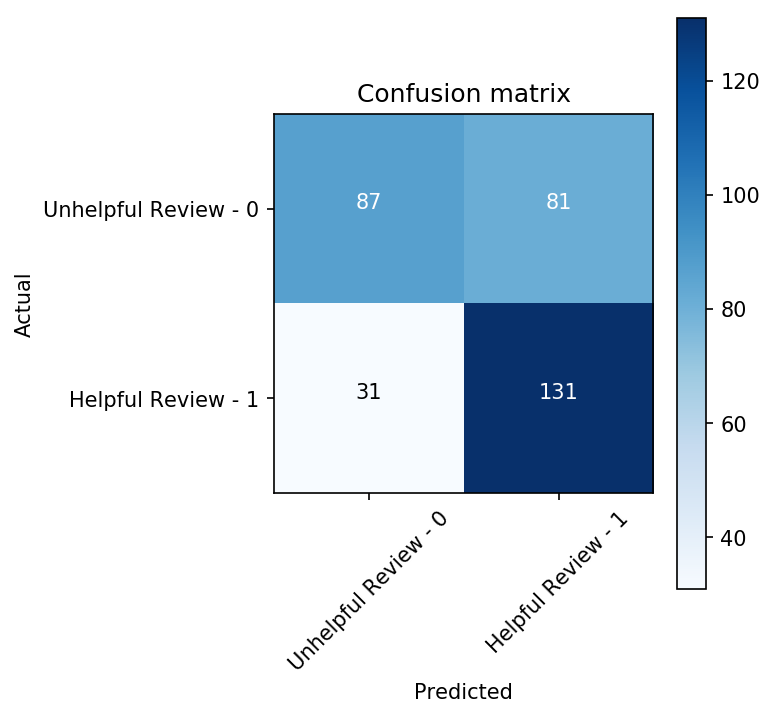

In [51]:
# A confusion Matrix can help us better understand how our classifier is doing.
from utilities import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predictions)
labels = ['Unhelpful Review - 0', 'Helpful Review - 1']
np.set_printoptions(precision=2)

plt.figure(figsize=(5,5), dpi=150)
plt.grid(False)
plot_confusion_matrix(conf_matrix, labels )
plt.show()

Precision and Recall can also help us understand how our predicitons are doing.

See the link below for a great explanation of Precision and Recall. This site is a great general resource for outher Data Science topics as well.
https://chrisalbon.com/machine-learning/precision_recall_and_F1_scores.html

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

             precision    recall  f1-score   support

        0.0       0.74      0.52      0.61       168
        1.0       0.62      0.81      0.70       162

avg / total       0.68      0.66      0.65       330



### Try it Out:

Iterate through the steps above to try and improve the model. You can adjust parameters in how the documents are vectorized and parameters for the classifier. You can also try using a different classifier like LinearSVC instead of MultinomialNB by substituting it in the last step of the pipeline above. You can use `pipeline.get_params().keys()` to get a listing of all the parameters available in the current pipeline. This is demonstrated in the cell below.

**What is the best overal classification accuracy that you can acheive?**

In [53]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'extractor', 'vect', 'clf', 'extractor__accept_sparse', 'extractor__func', 'extractor__inv_kw_args', 'extractor__inverse_func', 'extractor__kw_args', 'extractor__pass_y', 'extractor__validate', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__norm', 'vect__preprocessor', 'vect__smooth_idf', 'vect__stop_words', 'vect__strip_accents', 'vect__sublinear_tf', 'vect__token_pattern', 'vect__tokenizer', 'vect__use_idf', 'vect__vocabulary', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

# Clustering Text Documents

The data set for the next exercise contains reviews for the SanDisk Ultra 64GB MicroSDXC Memory Card. Imagine we work for SanDisk and our task is to sort through the negative reviews to find any discernible patterns. What can we learn from these negative reviews that will give insight on how we can improve our product?

In [54]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import spacy
nlp = spacy.load('en')  

from sklearn.cluster import KMeans

from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.palettes import viridis
from bokeh.models import HoverTool

In [55]:
# import sandisk review
sandisk_reviews = pd.read_csv("data/sandisk_sd_card_reviews.csv", index_col=0)

### Try it Out:

Preview the data set by using `.head()`. Notice the asin number is the same for every row, this is because the asin represents the product and all of these reviews are for the same product.

In [56]:
# Your code here



#### Hint:

In [57]:
sandisk_reviews.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
1336614,B007WTAJTO,"[0, 0]",4,No issues.,"07 23, 2014",A3SBTW3WS4IQSN,NaN,Four Stars,1406073600
1336615,B007WTAJTO,"[0, 0]",5,"Purchased this for my device, it worked as adv...","10 25, 2013",A18K1ODH1I2MVB,0mie,MOAR SPACE!!!,1382659200
1336616,B007WTAJTO,"[0, 0]",4,it works as expected. I should have sprung for...,"12 23, 2012",A2FII3I2MBMUIA,1K3,nothing to really say....,1356220800


## Process  the Data

In [58]:
# Let's drop any rows where there are missing values in 
# the overal and reviewText columns

print(sandisk_reviews.shape)
sandisk_reviews.dropna(axis=0, how='any', subset=['overall', 'reviewText'], inplace=True)

# See the shape after the drop
sandisk_reviews.shape

(4914, 9)


(4914, 9)

In [59]:
sandisk_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 1336614 to 1341528
Data columns (total 9 columns):
asin              4914 non-null object
helpful           4914 non-null object
overall           4914 non-null int64
reviewText        4914 non-null object
reviewTime        4914 non-null object
reviewerID        4914 non-null object
reviewerName      4913 non-null object
summary           4914 non-null object
unixReviewTime    4914 non-null int64
dtypes: int64(2), object(7)
memory usage: 383.9+ KB


So it looks like rating and review text are not missing for any of these columns. So we're good to go.

### Make a Subset of the Reviews

In [60]:
sandisk_bad_reviews = sandisk_reviews.loc[sandisk_reviews['overall'] <= 2].copy()

In [61]:
sandisk_bad_reviews.shape

(324, 9)

In [62]:
# We're going to make another column of a trimmed version of the review 
# We'll end up using this later on when we graph our data.
def review_trimmer(text):
    words = text.split()
    if len(words) > 200:
        words = words[0:75]
    words = ' '.join(words)
    return words

In [63]:
sandisk_bad_reviews['reviewPreview'] = sandisk_bad_reviews['reviewText'].apply(review_trimmer)

In [64]:
sandisk_bad_reviews.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewPreview
1336646,B007WTAJTO,"[0, 0]",1,"I bought 2 of those SanDisk 32 GB microSD , us...","08 3, 2013",AF24M1HKIZ7QC,"Abdulrahman J. Alrashed ""dr34m3r""",Bought 2 :) Died,1375488000,"I bought 2 of those SanDisk 32 GB microSD , us..."
1336652,B007WTAJTO,"[0, 0]",1,I bougth this micro SD card after some trubles...,"02 19, 2013",A1FKE13D77L3Y3,Abraham Arturo Meza Marin,Stop working after 1 year,1361232000,I bougth this micro SD card after some trubles...
1336657,B007WTAJTO,"[0, 1]",1,Ordered this for a Galaxy S3. Lasted a few mo...,"07 20, 2013",A1X1FX3NSOFCT3,"Abused Commuter ""abused_commuter""",Beware... goes bad and takes your pics with it,1374278400,Ordered this for a Galaxy S3. Lasted a few mon...


## Vectorize the Data

Use the same pipeline, `review_extractor` function and `spacy_tokenizer` from the classification example above to vectorize all the review text in the `sandisk_bad_reviews` data frame. However, remove the last step from the pipeline (the classifier) so the pipeline ends with a vectorizer, not a classifier. Use `fit_transform()` on the pipeline and assign the results to the variable tfidf_docs. Note that we don't need to split the data into training and test sets for this task.

In [65]:
# Your Code here




#### Hint:

In [66]:
# Custom Functions to extract the review text from the DF
def review_extractor(dataframe):
    return dataframe['reviewText'].tolist()

In [67]:
# Custom tokenizer using SpaCy
def spacy_tokenizer(doc_as_string):
    spacy_doc = nlp(doc_as_string)

    tokens = []
    for tok in spacy_doc:
        if tok.like_email == True:
            tokens.append('email')
        elif tok.like_url:
            tokens.append('URL')
        elif tok.lemma_ == "-PRON-":
            tokens.append(tok.lower_)
        elif tok.is_alpha == True:
            tokens.append(tok.lemma_)
    return tokens

In [68]:
tfidf_pipeline = Pipeline([
    ('extractor', FunctionTransformer(review_extractor, validate=False)),
    ('vect', TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1), use_idf=False, min_df=1)),
])

In [69]:
tfidf_docs = tfidf_pipeline.fit_transform(sandisk_bad_reviews)

## Cluster, Reduce and Plot the Documents

In [70]:
# Instantiate KMeans
kmeans = KMeans(n_clusters=7, n_jobs=-1, max_iter=700, n_init=15)

In [71]:
# Predict with Kmeans to generate unsupervised classes
cluster_labels = kmeans.fit_predict(tfidf_docs)

In [72]:
# Reduce the Term Matrix to 2 dimensions for Plotting
TSVD = TruncatedSVD(n_components=2, random_state=17)
reduced_docs = TSVD.fit_transform(tfidf_docs)

In [73]:
# Notice how everything gets reduced to 2 columns
print(reduced_docs.shape)
reduced_docs[0:3]

(324, 2)


array([[ 0.54,  0.21],
       [ 0.78,  0.04],
       [ 0.63,  0.01]])

In [74]:
# plot our classes
n_categores = pd.Series(cluster_labels).nunique()
color_swatches = viridis(n_categores)
categories =  np.unique(cluster_labels).tolist()
colormap = dict(zip(categories, color_swatches))
cat_colors = [colormap[i] for i in cluster_labels]


source = ColumnDataSource(data=dict(
    x = reduced_docs[:,0],
    y = reduced_docs[:,1],
    desc = sandisk_bad_reviews['reviewPreview'].tolist(),
    color=cat_colors,
    label = cluster_labels
))


hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("desc", "@desc")
])

p = figure(title = "Documents by Truncated SVD Values", width=700, height=700, tools=[hover, 'pan', 'box_zoom', 'reset', 'zoom_in','zoom_out'])
p.xaxis.axis_label = 'TSVD Dimension 1'
p.yaxis.axis_label = 'TSVD Dimension 2'

p.circle('x','y', size=8, fill_alpha=0.2, 
        color='color',
        legend='label',
         source=source,)

output_notebook(notebook_type='jupyter')
show(p)

Loading BokehJS ...

Iterate through the steps above and adjust parameters to see if you can find any natural clusters or trends in the reviews that would shed light on ways we might be able to improve our product.


# End of Part 2